In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
questions = pd.read_csv("Data/questions.csv")
answers = pd.read_csv("Data/answers.csv")
survey_year = pd.read_csv("Data/survey.csv")


In [4]:
# Merge both the csv on question id
survey_data = pd.merge(questions, answers, left_on="questionid",right_on="QuestionID")
survey_data.head()
# filter it for questions we need to keep. id 1 , 2 ,3 , 4 ,5 ,14 , 15 , 16 , 32
# create list with question ids to keep
question_ids = [1 , 2 , 3 , 4 , 5  , 14 , 15 , 16, 50 , 51 , 93, 8 , 9] 

filtered_df = survey_data[survey_data['QuestionID'].isin(question_ids)]

filtered_df = filtered_df.rename(columns={'questiontext' : 'Questions' , 'AnswerText' : 'Answers' , 'SurveyID' : 'Year'})

filtered_df

,Unnamed: 0_x,Questions,questionid,Unnamed: 0_y,Answers,Year,UserID,QuestionID
0,0,What is your age?,1,0,37,2014,1,1
1,0,What is your age?,1,1,44,2014,2,1
2,0,What is your age?,1,2,32,2014,3,1
3,0,What is your age?,1,3,31,2014,4,1
4,0,What is your age?,1,4,31,2014,5,1
...,...,...,...,...,...,...,...,...
200540,79,Do you work remotely (outside of an office) at...,93,20155,Yes,2014,1256,93
200541,79,Do you work remotely (outside of an office) at...,93,20156,No,2014,1257,93
200542,79,Do you work remotely (outside of an office) at...,93,20157,Yes,2014,1258,93
200543,79,Do you work remotely (outside of an office) at...,93,20158,No,2014,1259,93


In [5]:
 # Pivoted dataframe to get questions as columns 

pivoted_df = filtered_df.pivot(index='UserID' , columns='Questions', values='Answers' )

# reorder columns

pivoted_df = pivoted_df[['What is your age?' ,'What is your gender?', 'What country do you live in?' , 'If you live in the United States, which state or territory do you live in?' ,'Are you self-employed?' ,'Do you know the options for mental health care available under your employer-provided health coverage?' , 
                         'Does your employer offer resources to learn more about mental health disorders and options for seeking help?',
                         'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
                         'Do you work remotely (outside of an office) at least 50% of the time?',
                         'How many employees does your company or organization have?',
                         'Is your employer primarily a tech company/organization?']]

# rename columns 

pivoted_02_df = pivoted_df.rename(columns={'What is your age?' : 'Age' , 'What is your gender?': 'Gender' , 'What country do you live in?':'Country' ,'If you live in the United States, which state or territory do you live in?': 'State/Territory',
                                            'Are you self-employed?' : 'self-employed?','Do you work remotely (outside of an office) at least 50% of the time?': 'Remote_Work',
                                            'How many employees does your company or organization have?':'Total Employees', 'Is your employer primarily a tech company/organization?':'Tech/NonTech'
                                              })


pivoted_02_df




Questions,Age,Gender,Country,State/Territory,self-employed?,Do you know the options for mental health care available under your employer-provided health coverage?,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Remote_Work,Total Employees,Tech/NonTech
UserID,,,,,,,,,,,
1,37,Female,United States,Illinois,-1,NaN,NaN,NaN,No,6-25,1
2,44,Male,United States,Indiana,-1,NaN,NaN,NaN,No,More than 1000,0
3,32,Male,Canada,-1,-1,NaN,NaN,NaN,No,6-25,1
4,31,Male,United Kingdom,-1,-1,NaN,NaN,NaN,No,26-100,1
5,31,Male,United States,Texas,-1,NaN,NaN,NaN,Yes,100-500,1
...,...,...,...,...,...,...,...,...,...,...,...
4214,27,male,India,-1,0,No,I don't know,No,NaN,More than 1000,0
4215,48,Male,United States of America,Louisiana,1,-1,-1,-1,NaN,-1,-1
4216,50,Male,India,-1,1,-1,-1,-1,NaN,-1,-1


Null Hypothesis: Company Size has no significance on Mental Health study.

Alternate Hypothesis: Company Size has significance on Mental Health study.


In [8]:
# Observed data 
observed = pd.Series([788,247,912], index=["1", "2", "3"])

# Create a data frame
df1 = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df1[1] = 649

# Rename the columns
df1.columns = ["observed", "expected"]

# View the data frame
df1

,observed,expected
1,788,649
2,247,649
3,912,649


In [9]:
# With four rows, the degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [10]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df1['observed'], df1['expected'])

Power_divergenceResult(statistic=385.3528505392912, pvalue=2.0974504628682817e-84)

### Conclusion
Since the chi-square value of 385.35 at a confidence level of 95% exceeds the critical value of 5.99, we conclude that the differences seen in the size of company are statistically significant.

Analysis of Company Size on Mental Health Study :

In [11]:
pivoted_02_df["Total Employees"].describe()


count               4218
unique                 7
top       More than 1000
freq                 912
Name: Total Employees, dtype: object

In [12]:
pivoted_02_df["Total Employees"].value_counts()

More than 1000    912
26-100            824
100-500           788
6-25              689
-1                504
1-5               254
500-1000          247
Name: Total Employees, dtype: int64

In [13]:
pivoted_02_df["Total Employees"].replace('-1','dont know')

UserID
1                 6-25
2       More than 1000
3                 6-25
4               26-100
5              100-500
             ...      
4214    More than 1000
4215         dont know
4216         dont know
4217    More than 1000
4218    More than 1000
Name: Total Employees, Length: 4218, dtype: object

In [14]:
pivoted_02_df["Total Employees"].isnull().values.any()
pivoted_02_df["Total Employees"].dropna()

UserID
1                 6-25
2       More than 1000
3                 6-25
4               26-100
5              100-500
             ...      
4214    More than 1000
4215                -1
4216                -1
4217    More than 1000
4218    More than 1000
Name: Total Employees, Length: 4218, dtype: object

In [15]:

Employees_count = [788,247,912]
x_axis = np.arange(len(Employees_count))

Text(0, 0.5, 'Frequency of Mental Health (Total Employees)')

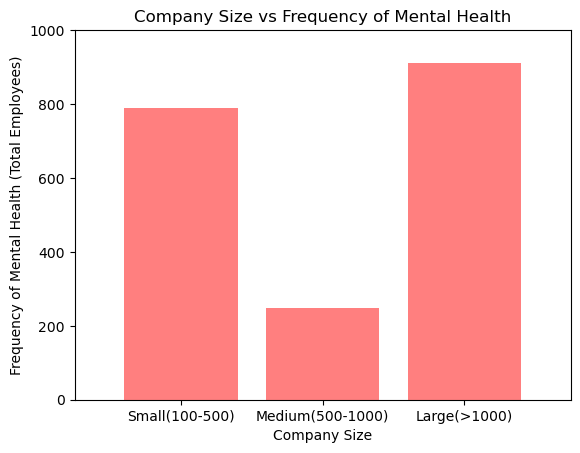

In [16]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Small(100-500)", "Medium(500-1000)","Large(>1000)"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0,1000)
plt.bar(x_axis, Employees_count, color='r', alpha=0.5, align="center")

# Give our chart some labels and a title
# Give our chart some labels and a tile
plt.title("Company Size vs Frequency of Mental Health")
plt.xlabel("Company Size")
plt.ylabel("Frequency of Mental Health (Total Employees)")


Large Companies have more mental health cases than Small and Medium

In [17]:
pivoted_02_df["Remote_Work"].dropna()

UserID
1        No
2        No
3        No
4        No
5       Yes
       ... 
1256    Yes
1257     No
1258    Yes
1259     No
1260     No
Name: Remote_Work, Length: 1260, dtype: object

In [19]:
remote_work_df = pivoted_02_df["Remote_Work"].value_counts()
remote_work_df

No     884
Yes    376
Name: Remote_Work, dtype: int64

Text(0.5, 1.0, 'Remote Work vs No Remote')

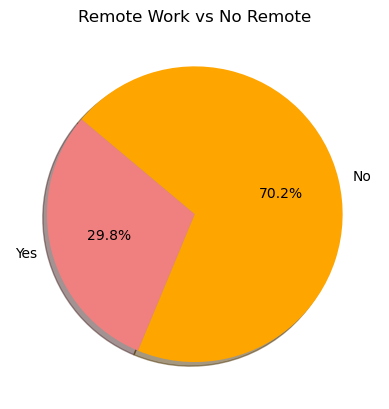

In [20]:
labels = ["Yes","No"]
sizes = [376, 884]
colors = ["lightcoral", "orange"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Remote Work vs No Remote")

Number of Mental health problem is less for remote workers than from non remote workers(working in office).

Null Hypothesis: Job type has no statistical significance on Mental Health study.

Alternate Hypothesis: Job type has statistical significance on Mental Health study.

In [ ]:
# Observed data in a (hypothetical) survey of 6000 people 
observed = pd.Series([2888,826,504], index=["1", "2","3"])

# Create a data frame
df2 = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df2[1] = 1406

# Rename the columns
df2.columns = ["observed", "expected"]

# View the data frame
df2

,observed,expected
1,2888,1406
2,826,1406
3,504,1406


In [ ]:
# With four rows, the degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [ ]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df2['observed'], df2['expected'])

Power_divergenceResult(statistic=2380.0341394025604, pvalue=0.0)

### Conclusion
* Since the chi-square value of 2380.03 at a confidence level of 95% exceeds the critical value of 5.99, we conclude that the differences seen in the number of Tech/NonTech job type are statistically significant.

Job Type and Mental Health analysis -

In [ ]:
pivoted_02_df["Tech/NonTech"].value_counts()

1     2888
0      826
-1     504
Name: Tech/NonTech, dtype: int64

In [ ]:
pivoted_02_df["Tech/NonTech"].isnull().values.any()

False

In [ ]:
pivoted_02_df["Tech/NonTech"].dropna()

UserID
1        1
2        0
3        1
4        1
5        1
        ..
4214     0
4215    -1
4216    -1
4217     1
4218     1
Name: Tech/NonTech, Length: 4218, dtype: object

In [ ]:
pivoted_02_df["Tech/NonTech"].describe()

count     4218
unique       3
top          1
freq      2888
Name: Tech/NonTech, dtype: object

In [ ]:
pivoted_02_df["Tech/NonTech"].unique()

array(['1', '0', '-1'], dtype=object)

In [ ]:

job_type = [2888,826,504]
x_axis = np.arange(len(job_type))

Text(0, 0.5, 'Frequency of Mental Health Problems')

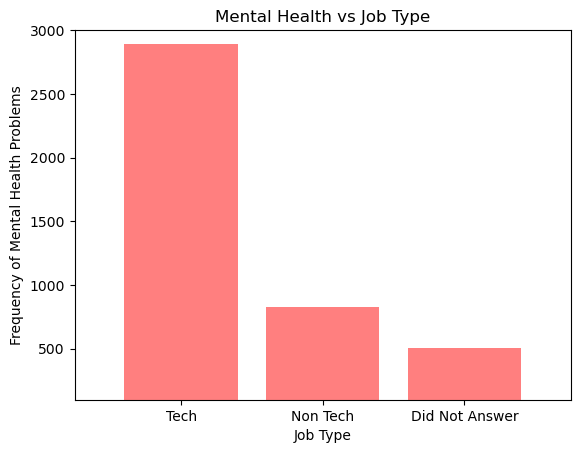

In [ ]:
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Tech", "Non Tech","Did Not Answer"])
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(100,3000)
plt.bar(x_axis, job_type, color='r', alpha=0.5, align="center")

# Give our chart some labels and a title

plt.title("Mental Health vs Job Type")
plt.xlabel("Job Type")
plt.ylabel("Frequency of Mental Health Problems")

People working in Tech job type has more cases of Mental Health than one in Non Tech job type